<a href="https://colab.research.google.com/github/gbiamgaurav/Deep-Learning-/blob/main/Deep%20Learning%20Implementation%20-%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#! pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [5]:
df = dataset.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Divide the dataset into independent and dependent features

X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
## Feature Engineering

geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [10]:
## Concatenate these variables with dataframe
X= X.drop(['Geography', 'Gender'], axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X = pd.concat([X,geography,gender], axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
## Splitting the dataset into Training and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [18]:
X_train.shape

(8000, 11)

In [19]:
## Part -2 Now lets create ANN 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [20]:
## Lets initialize ANN
classifier = Sequential()

In [21]:
## Adding the input layer 
classifier.add(Dense(units=11, activation='relu'))

In [22]:
## Adding the First hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [23]:
## Adding the Second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [24]:
## Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))


In [25]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
#classifier.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [28]:
#classifier.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [30]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.5543 - accuracy: 0.7835 - val_loss: 0.4850 - val_accuracy: 0.7940
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4771 - accuracy: 0.7972 - val_loss: 0.4447 - val_accuracy: 0.7940
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4537 - accuracy: 0.7981 - val_loss: 0.4349 - val_accuracy: 0.7952
Epoch 4/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.4414 - accuracy: 0.8009 - val_loss: 0.4256 - val_accuracy: 0.7982
Epoch 5/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.4323 - accuracy: 0.8104 - val_loss: 0.4207 - val_accuracy: 0.8031
Epoch 6/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.4259 - accuracy: 0.8102 - val_loss: 0.4168 - val_accuracy: 0.8016
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4239 - accuracy: 0.8112 - val_loss: 0.4083 - val_accuracy:

In [31]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

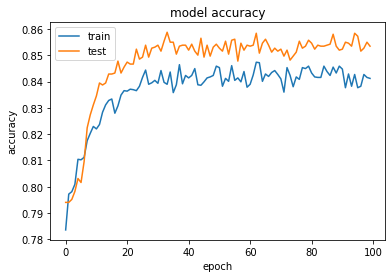

In [32]:
## Summarizr history for Accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

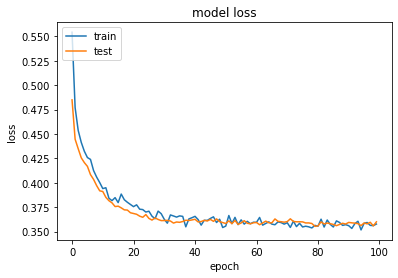

In [33]:
## Summarizr history for Accuracy

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

In [34]:
## Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [35]:
## Make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1540,   55],
       [ 231,  174]])

In [36]:
## Calculate the accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print("Score of the Model is", score)

Score of the Model is 0.857


In [37]:
## get the weights
classifier.get_weights()

[array([[-0.02308954,  0.10187238, -0.02547778,  0.235827  ,  0.02211886,
          0.05750643, -0.03955068,  0.06310178, -0.20377032, -0.02247358,
          0.09670179],
        [-0.12424172, -0.9066965 ,  0.32402378, -0.8600024 , -0.6706341 ,
          0.13205008, -0.28692594,  0.74355465, -0.57611775, -0.7447785 ,
          0.6214304 ],
        [-0.1470082 ,  0.16820942,  0.23223169,  0.19144149, -0.06913507,
          0.04826429,  0.48852062, -0.0037717 , -0.12338544, -0.15062158,
          0.1074495 ],
        [-0.22648562, -0.33233437, -0.07242682, -0.07495236,  0.07239285,
          0.310714  , -0.67905235, -0.28330123, -0.00537402,  0.43687284,
         -0.3236751 ],
        [-1.2721161 , -0.08867741, -0.20921153, -0.17313503, -0.4048345 ,
          1.2056866 , -1.0021061 , -1.1335703 , -0.05664618,  0.23725002,
         -0.12517329],
        [ 0.41808498, -0.5820794 ,  0.12974654,  0.86045486,  0.33373982,
          0.07777569, -0.23604436,  0.03187562,  0.45692486,  0.4215926